<a href="https://colab.research.google.com/github/SSDivyaRavali/CDS/blob/main/Module3/M3_SNB_MiniProject_3_Dementia_Prediction_SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Dementia prediction using SVM

## Problem Statement

Prediction of Dementia using an SVM model on brain MRI features

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement SVM Classifier on the data
* explore various parameters of SVM classifier and implement OneVsOne classifier
* calculate the metrics and plot the roc_curve

## Information

**About Dementia**

Dementia is a general term for loss of memory and other mental abilities severe enough to interfere with daily life. It is caused by physical changes in the brain. Alzheimer's is the most common type of dementia, but there are many kinds.

**Brain Imaging via magnetic resonance imaging (MRI) and Machine Learning**

* MRI is used for the evaluation of patients with suspected Alzheimer's disease
* MRIs detect both, local and generalized shrinkage of brain tissue.
* MRI features predict the rate of decline of AD and may guide therapy in the future
* Using machine learning on MRI features could help in automatedly and accurately predicting the progress of a patient from mild cognitive impairment to dementia

To understand the basics of MRI technique, you could refer [here](https://case.edu/med/neurology/NR/MRI%20Basics.htm)

## Dataset

The dataset chosen for this mini-project is [OASIS - Longitudinal brain MRI Dataset](https://www.oasis-brains.org/). This dataset consists of a longitudinal MRI collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

**Dataset fields:**

* Subject ID - Subject Identification
* MRI ID - MRI Exam Identification
* Group - Target variable with 3 labels ('NonDemented', 'Demented', 'Converted')
* Visit - Visit order
* MR Delay - MR Delay Time (Contrast)
* M/F - Male or Female
* Hand - Unique value 'R'
* MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
* CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)
* Derived anatomic volumes
* eTIV - Estimated total intracranial volume, mm3
* nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
* ASF - Atlas scaling factor (unitless). A computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

For learning more on building a machine learning model to predict dementia using SVM, refer [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7408873/).

## Grading = 10 Points

### Download the dataset

In [1]:
!wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/oasis_longitudinal.csv

--2022-08-25 15:41:29--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/oasis_longitudinal.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28290 (28K) [application/octet-stream]
Saving to: ‘oasis_longitudinal.csv’

oasis_longitudinal. 100%[===================>]  27.63K  --.-KB/s    in 0s      

2022-08-25 15:41:30 (464 MB/s) - ‘oasis_longitudinal.csv’ saved [28290/28290]



### Import required packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Load the dataset

In [43]:
data = pd.read_csv("oasis_longitudinal.csv")
data.head(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046


In [4]:
data.shape

(373, 15)

In [5]:
data.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

### Pre-processing and Data Engineering

In [11]:
data.describe(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


In [10]:
data.describe(include=[np.number])

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#### Remove unwanted columns

In [44]:
data.drop(['MRI ID','Hand','Subject ID'],axis=1, inplace=True)

In [13]:
data.head(2)

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876


In [14]:
# checking missing values in each column
data.isna().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [15]:
# for better understanding lets check the percentage of missing values in each column
round(data.isnull().sum()/len(data.index), 2)*100

Group       0.0
Visit       0.0
MR Delay    0.0
M/F         0.0
Age         0.0
EDUC        0.0
SES         5.0
MMSE        1.0
CDR         0.0
eTIV        0.0
nWBV        0.0
ASF         0.0
dtype: float64

In [17]:
# Plotting distribution of SES
def univariate_mul(var):
    fig = plt.figure(figsize=(16,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(212)
    data[var].plot(kind='hist',ax=ax1, grid=True)
    ax1.set_title('Histogram of '+var, fontsize=14)
    
    ax2=sns.distplot(data[[var]],hist=False)
    ax2.set_title('Distribution of '+ var)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


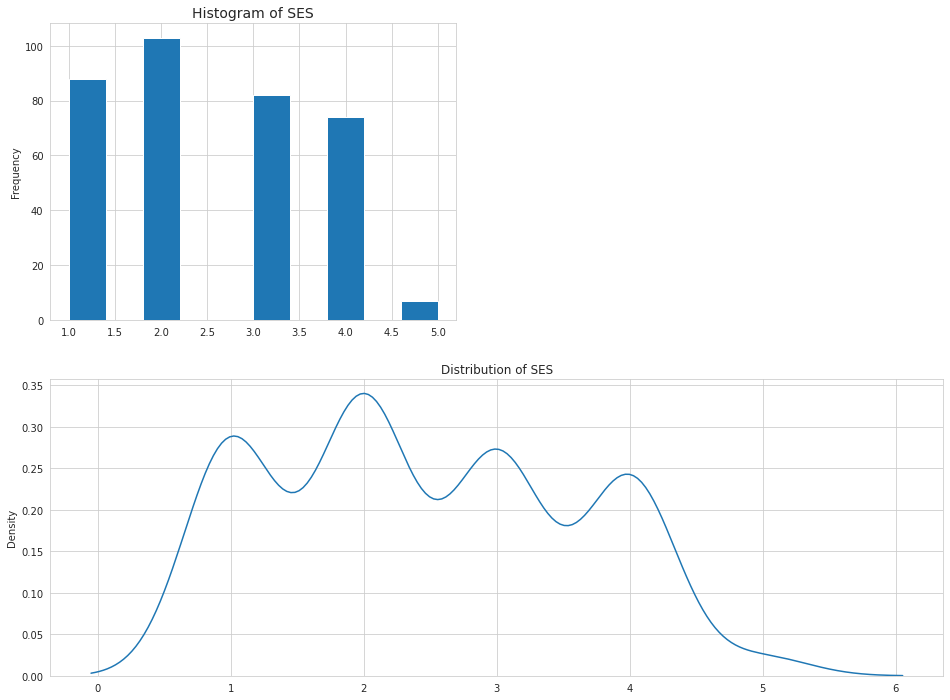

In [18]:
# lets see the distribution of SES to decide which value we can impute in place of missing values.
univariate_mul('SES')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


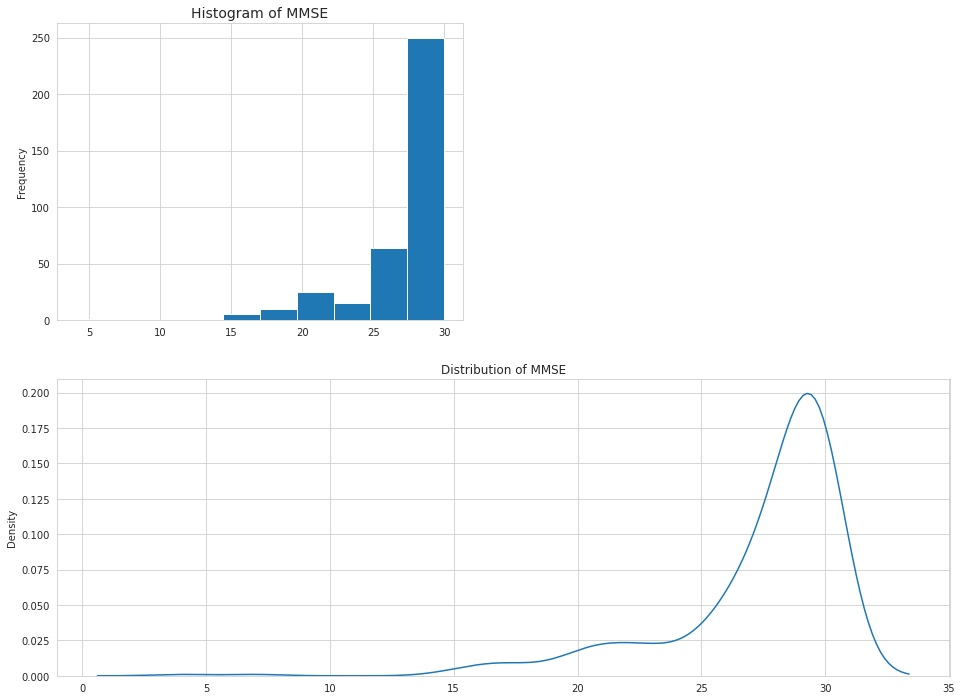

In [19]:
univariate_mul('MMSE')

#### Encode columns into numeric

In [45]:
le = LabelEncoder()
data['M/F'] = le.fit_transform(data['M/F'])
data.head(2)

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876


#### Handle the null values by removing or replacing

In [46]:
# imputing missing value in SES with median
data['SES'].fillna((data['SES'].median()), inplace=True)
data['MMSE'].fillna((data['MMSE'].median()), inplace=True)

In [ ]:
data.fillna(data.mean(), inplace=True)
data.isna().sum()

#### Identify feature and target and split it into train test

In [47]:
X = data.drop('Group',axis=1)
y = data['Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [48]:
# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_trainval_scaled.shape, X_test_scaled.shape, Y_trainval.shape

((279, 11), (94, 11), (279,))

In [ ]:
X_train.shape, X_test.shape, y_train.shape

### EDA &  Visualization

#### Plot the distribution of all the variables using histogram

Univariate Analysis

In [21]:
# Defining function to create pie chart and bar plot as subplots
def plot_piechart(var):
  plt.figure(figsize=(14,7))
  plt.subplot(121)
  label_list = data[var].unique().tolist()
  data[var].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=label_list,
  wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
  plt.title("Distribution of "+ var +"  variable")

  plt.subplot(122)
  ax = data[var].value_counts().plot(kind="barh")

  for i,j in enumerate(data[var].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

  plt.title("Count of "+ var +" cases")
  plt.show()

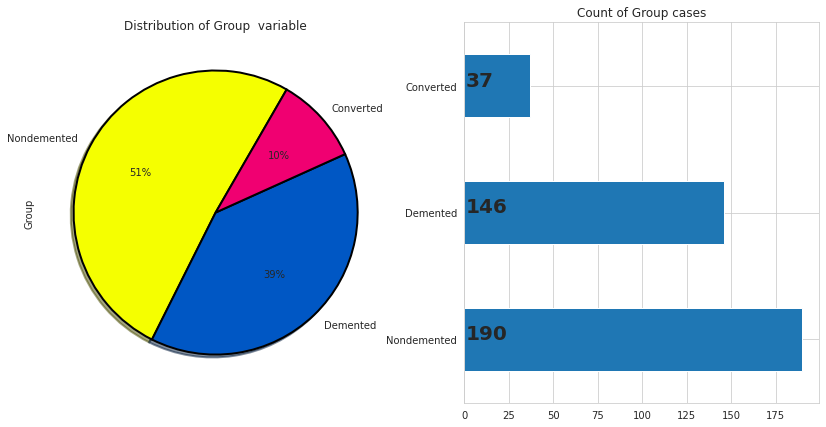

In [22]:
plot_piechart('Group')

In [23]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR",split=True, data=data)
plt.show()

ValueError: ignored

<Figure size 864x576 with 0 Axes>

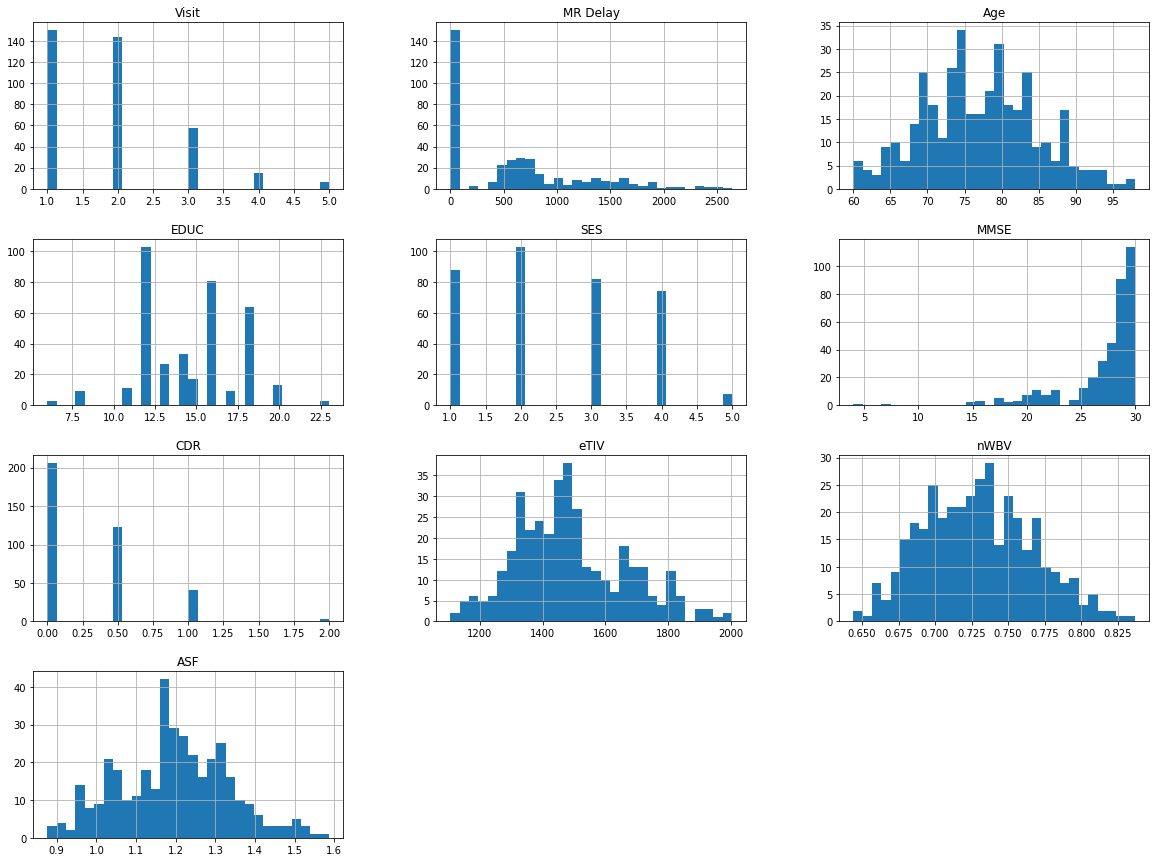

In [7]:
data.hist(bins=30, figsize=(20,15))
plt.show()

#### Visualize the frequency of Age

In [24]:
data['age_group'] = pd.cut(data['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
data['age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: age_group, dtype: int64

In [26]:
# Plotting CDR with other variable
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = data.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())
         ).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Dementia status (Normal vs Dementia)')
    ax1.legend(loc="lower right")
    group_by_stat = data.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Cases')
    plt.show()



# Categorizing feature CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

data['CDR'] = data['CDR'].apply(lambda x: cat_CDR(x))

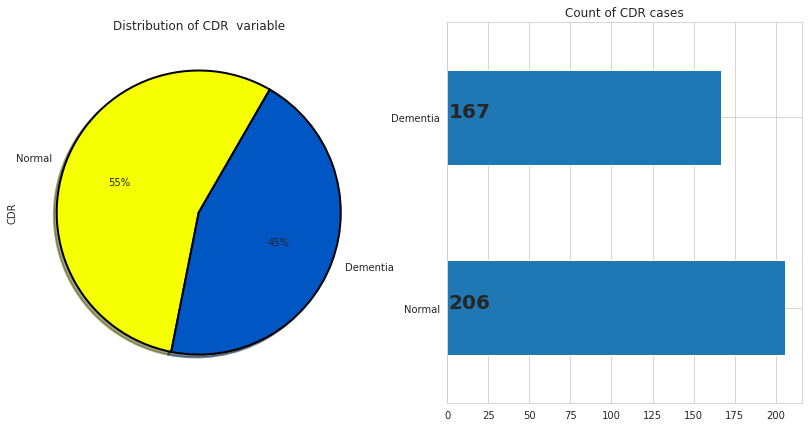

In [27]:
plot_piechart('CDR')

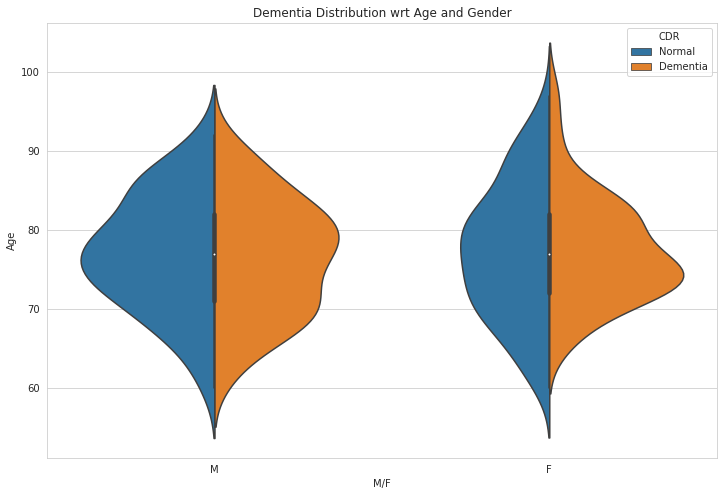

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR",split=True, data=data)
plt.title("Dementia Distribution wrt Age and Gender")
plt.show()

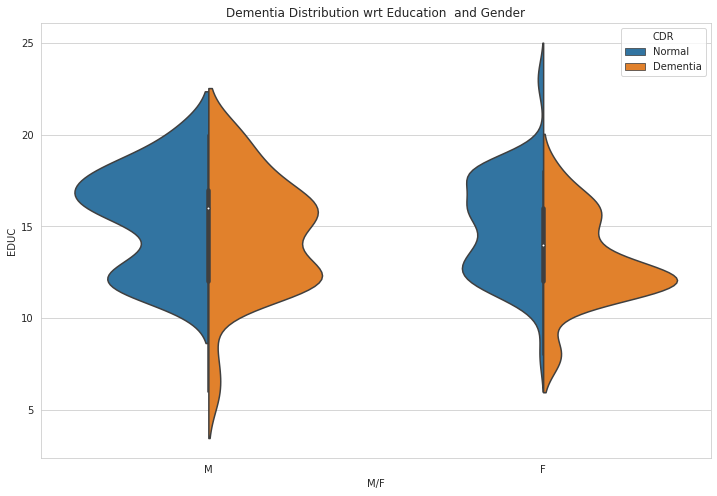

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR",split=True, data=data)
plt.title("Dementia Distribution wrt Education  and Gender")
plt.show()

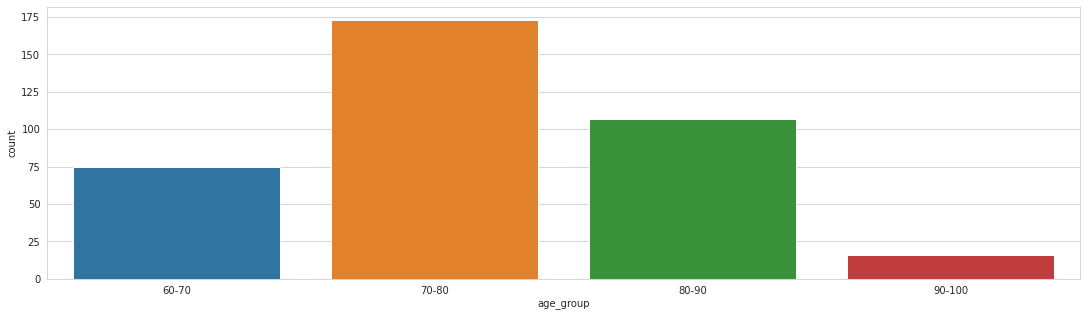

In [25]:
ax = sns.countplot(x='age_group', data=data)
ax.figure.set_size_inches(18.5, 5)

#### How many people have Alzheimer? Visualize with an appropriate plot

the same person visits two or more times; extract the single visit data and plot

**Hint**: Visit = 1

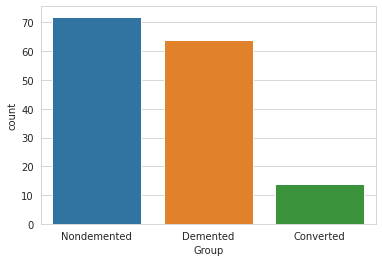

In [9]:
sns.set_style("whitegrid")
ex_df = data.loc[data['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

#### Calculate the correlation of features and plot the heatmap

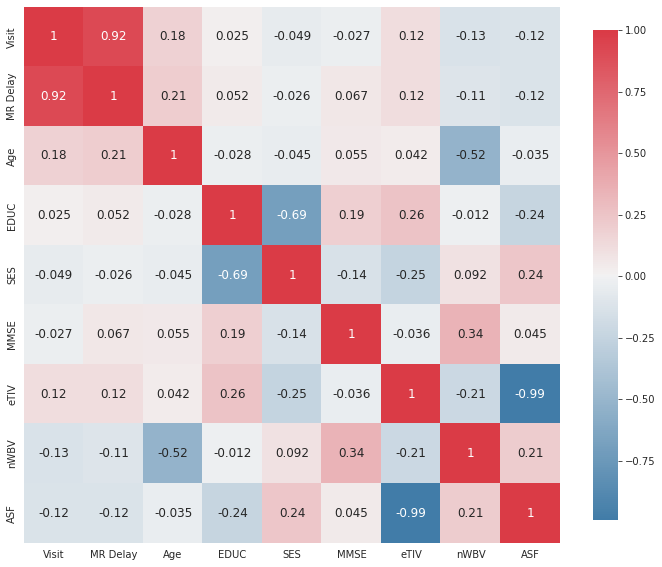

In [31]:
corr = data.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

### Model training and evaluation

**Hint:** SVM model from sklearn

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [55]:
acc = [] # list to store all performance metric
# Dataset with imputation
best_score = 0
kfolds=5 # set the number of folds

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                
                best_parameter_k = k_parameter
                
            

print('C',best_parameter_c)
print('Gamma',best_parameter_gamma)
print('k',best_parameter_k)

C 0.1
Gamma 1
k poly


In [65]:
# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput,pos_label='positive',average='micro')
#fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput,pos_label='positive')
#test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
#print("Test recall with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall])
#acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.914025974025974
Best parameter for c is:  0.1
Best parameter for gamma is:  1
Best parameter for kernel is:  poly
Test accuracy with the best parameters is 0.9148936170212766
Test recall with the best parameters is 0.9148936170212766


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [66]:
X = data.drop('Group',axis=1)
y = data['Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [67]:
# SVC model
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

test_acc = svm.score(X_test, y_test)
train_acc = svm.score(X_train, y_train)
print("Train accuracy is: {} \nTest accuracy is: {}".format(train_acc, test_acc))

Train accuracy is: 0.9283582089552239 
Test accuracy is: 0.868421052631579


In [68]:
# Checking the misclassifications
model1_predictions = svm.predict(data.drop('Group',axis=1))
model1_misclassified  = data[data['Group']!=model1_predictions]
len(model1_misclassified)

29

#### Support vectors of the model

* Find the samples of the dataset which are the support vectors of the model 

In [69]:
support_vectors = pd.DataFrame(svm.support_vectors_,columns=X_train.columns)
support_vectors

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1.0,0.0,0.0,68.0,16.0,3.0,30.0,0.0,1298.0,0.799,1.352
1,2.0,1554.0,0.0,74.0,16.0,1.0,30.0,0.5,1423.0,0.722,1.233
2,1.0,0.0,0.0,69.0,16.0,1.0,30.0,0.0,1404.0,0.750,1.250
3,3.0,2002.0,0.0,75.0,16.0,1.0,30.0,0.5,1419.0,0.731,1.236
4,2.0,756.0,0.0,73.0,16.0,1.0,28.0,0.0,1295.0,0.768,1.356
...,...,...,...,...,...,...,...,...,...,...,...
98,3.0,1598.0,0.0,83.0,16.0,2.0,29.0,0.0,1323.0,0.718,1.327
99,2.0,791.0,0.0,77.0,18.0,1.0,28.0,0.0,1559.0,0.713,1.125
100,1.0,0.0,1.0,80.0,17.0,1.0,28.0,0.0,1660.0,0.728,1.057
101,2.0,730.0,0.0,80.0,16.0,2.0,29.0,0.0,1323.0,0.738,1.326


#### Confusion matrix for multi-class classification

* Predict the test and plot the confusion matrix

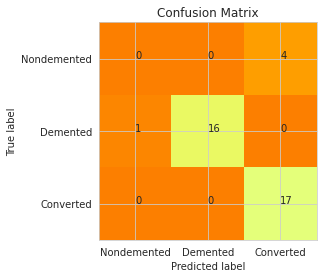

In [70]:
multi_cm = metrics.confusion_matrix(y_test, svm.predict(X_test))
plt.imshow(multi_cm,  cmap=plt.cm.Wistia_r)
classNames = ['Nondemented','Demented','Converted']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(3):
    for j in range(3):
        plt.text(j,i, str(multi_cm[i][j]))
plt.show()

#### One VS Rest Classifier

OneVsRestClassifier can also be used for multilabel classification. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed)

* Fit the OneVsRestClassifier on the data and find the accuracy

Hint: [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
clf_OneVsRest = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train, y_train)
clf_OneVsRest.score(X_test, y_test)

#### One VS One Classifier

This strategy consists in fitting one classifier per class pair. At prediction time, the class which received the most votes is selected.

* Fit the OneVsOneClassifier on the data and find the accuracy

Hint: [OneVsOneClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
clf_OneVsOne = OneVsOneClassifier(SVC(kernel='linear',random_state=0)).fit(X_train, y_train)
clf_OneVsOne.score(X_test, y_test)

#### Make it binary classification

As stated in dataset description, 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit. Change `Converted` label into `Demented`.

**Note:** In two-class classification, encode the labels into numerical to plot the roc_curve with predictions.

In [71]:
# Combining 3rd label and 2nd label
data['Group'] = data['Group'].replace(['Converted'], ['Demented'])
data['Group'] = LabelEncoder().fit_transform(data['Group'])

In [72]:
# SPlit the data which is having 2 labels
X1 = data.drop('Group',axis=1)
y1 = data['Group']
xtrain, xtest, ytrain, ytest = train_test_split(X1, y1, test_size=0.10, random_state=42)

In [73]:
ytrain.value_counts()

1    173
0    162
Name: Group, dtype: int64

In [74]:
svm_binary_model = SVC(kernel="linear")
svm_binary_model.fit(xtrain, ytrain)
predicted = svm_binary_model.predict(xtest)
svm_binary_model.score(xtest, ytest), svm_binary_model.score(xtrain, ytrain)

(0.8947368421052632, 0.9522388059701492)

In [75]:
# predictions
model2_predictions = svm_binary_model.predict(xtest)
model2_predictions

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [76]:
# comparing 3-class with 2-class predictions
np.array([0 if i=='Demented' else 1 for i in svm.predict(xtest) ]) == model2_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

### Classification report and metrics

#### Confusion matrix

Describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

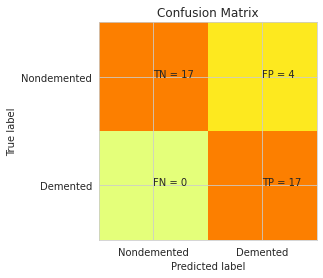

In [77]:
cm = metrics.confusion_matrix(ytest, predicted)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Nondemented','Demented']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel,xtrain, ytrain, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            

# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(xtrain, ytrain)

test_score = SelectedSVMmodel.score(xtest, ytest)
PredictedOutput = SelectedSVMmodel.predict(xtest)
test_recall = recall_score(ytest, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(ytest, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

#### Plot the ROC Curve

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

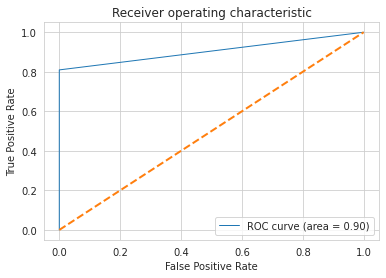

In [78]:
fpr, tpr, thresholds = metrics.roc_curve(predicted,ytest)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr,  lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Choice of C for SVM

experiment with different C values given and plot the ROC curve for each

<Figure size 432x288 with 0 Axes>

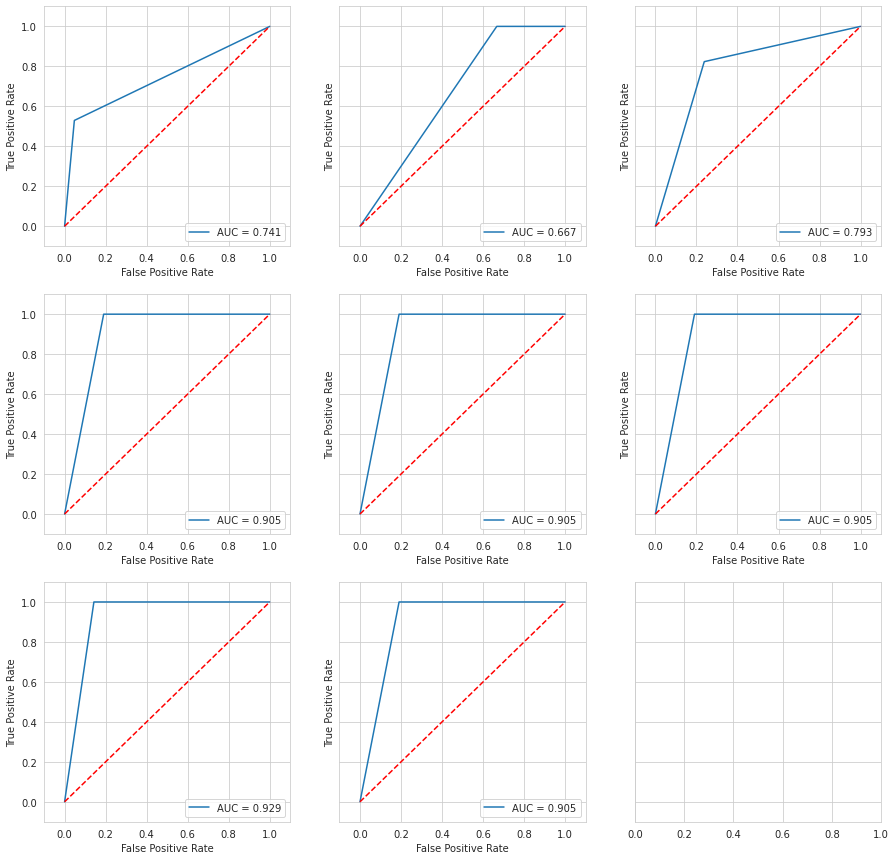

In [79]:
import math

c_val = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
num_cols = 3
num_rows = math.ceil(len(c_val) / num_cols)

# create a single figure
plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(c_val):
    svm_model = SVC(kernel='linear',C=g).fit(xtrain,ytrain )
    y_preds = svm_model.predict(xtest)
    fpr, tpr, _ = metrics.roc_curve(ytest, y_preds)
    auc_score = metrics.auc(fpr, tpr)
    ax = axes[i // num_cols, i % num_cols]
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.show()

### Report Analysis

* Compare the performance of the model with various Kernel parameters.
* Discuss the impact of parameter C and gamma on performance.
* Comment on the computational cost of implementing one vs one and one vs all to solve multi-class classification with binary classifier.
* When do you call a sample/record in the data as a support vector?